# Initial data exploration

### Overview

* This notebook carries out initial exploration and cleaning of the three main datasets:
    1. NYC graffiti report
        - link to source
    2. NYC crime data
        - link to source
    3. NYPD complaints data
        - link to source

### Setup

In [53]:
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

## Load the data sets

### 1. Graffiti dataset

* Source: https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking-Map-/v9sd-nunw]



In [2]:
graffiti_df = pd.read_csv('../data/graffiti.csv')

In [3]:
graffiti_df.shape

(759, 19)

* 759 rows (observations)
* 19 columns (variables)


Take a random sample of 50 rows to get a sense of the data

In [4]:
graffiti_df.sample(50)

,INCIDENT_ADDRESS,BOROUGH,COMMUNITY_BOARD,POLICE_PRECINCT,CITY_COUNCIL_DISTRICT,BBL,CREATED_DATE,STATUS,RESOLUTION_ACTION,CLOSED_DATE,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,ZIP_CODE,CENSUS_TRACT,BIN,NTA,LOCATION
354,2262 8 AVENUE,MANHATTAN,10 MANHATTAN,Precinct 28,9.0,1.019270e+09,08/07/2021,Open,Graffiti Reported,NaN,997335.0,233664.0,40.808020,-73.952733,10027.0,220.0,1058492.0,Central Harlem South,"(40.80802, -73.952733)"
229,80 MAIDEN LANE,MANHATTAN,01 MANHATTAN,Precinct 1,1.0,1.000420e+09,07/25/2021,Open,Graffiti Reported,NaN,982218.0,196898.0,40.707116,-74.007329,10038.0,7.0,1001015.0,Battery Park City-Lower Manhattan,"(40.707116, -74.007329)"
495,210 EAST 111 STREET,MANHATTAN,11 MANHATTAN,Precinct 23,8.0,1.016600e+09,11/17/2021,Open,Graffiti Reported,NaN,1000349.0,228755.0,40.794541,-73.941857,10029.0,180.0,1052484.0,East Harlem North,"(40.794541, -73.941857)"
688,86 CLINTON STREET,MANHATTAN,03 MANHATTAN,Precinct 7,1.0,1.003480e+09,01/06/2022,Open,Site to be cleaned.,NaN,988315.0,201060.0,40.718622,-73.985296,10002.0,1402.0,1004197.0,Lower East Side,"(40.718622, -73.985296)"
185,711 WEST END AVENUE,MANHATTAN,07 MANHATTAN,Precinct 24,6.0,1.012530e+09,07/29/2021,Open,Graffiti Reported,NaN,991484.0,228686.0,40.794364,-73.973874,10025.0,183.0,1034181.0,Upper West Side,"(40.794364, -73.973874)"
216,110 EAST 4 STREET,MANHATTAN,03 MANHATTAN,Precinct 9,2.0,1.004450e+09,12/07/2021,Open,Graffiti Reported,NaN,987756.0,203527.0,40.725643,-73.988152,10003.0,38.0,1006172.0,East Village,"(40.725643, -73.988152)"
31,117 WEST 26 STREET,MANHATTAN,05 MANHATTAN,Precinct 13,3.0,1.008020e+09,08/12/2021,Open,Site downloaded for cleaning,NaN,986412.0,210751.0,40.745139,-73.992198,10001.0,95.0,1015039.0,Midtown-Midtown South,"(40.745139, -73.992198)"
690,78 FORSYTH STREET,MANHATTAN,03 MANHATTAN,Precinct 5,1.0,1.003060e+09,12/01/2021,Open,Site downloaded for cleaning,NaN,986092.0,200642.0,40.717393,-73.993355,10002.0,16.0,1003953.0,Chinatown,"(40.717393, -73.993355)"
686,172 FIRST AVENUE,MANHATTAN,03 MANHATTAN,Precinct 9,2.0,1.004380e+09,11/08/2021,Open,Graffiti Reported,NaN,988628.0,204895.0,40.729065,-73.984204,10009.0,34.0,1005932.0,East Village,"(40.729065, -73.984204)"
203,437 PARK AVENUE SOUTH,MANHATTAN,05 MANHATTAN,Unspecified,2.0,1.008850e+09,09/15/2021,Open,Graffiti Reported,NaN,988877.0,210470.0,40.744367,-73.983302,10016.0,72.0,1018293.0,Murray Hill-Kips Bay,"(40.744367, -73.983302)"


* Look at the column names to understand the variables


1. `INCIDENT_ADDRESS` - Street address of reported graffiti
1. `BOROUGH` - there are 5 boroughs in New York City, but we are only focusing on Manhattan
1. `COMMUNITY_BOARD` - Manhattan has 12 community boards, which group multiple neighborhoods
1. `POLICE_PRECINCT` - A geographical area patrolled by a police force
1. `CITY_COUNCIL_DISTRICT` - differentiates areas that are are each represented by an elected Council Member
1. `BBL` - stands for Borough-Block-Lot:parcel numbers that identify the location of buildings or properties
1. `CREATED_DATE` - when the report was made
1. `STATUS` - whether the case is open or not 
1. `RESOLUTION_ACTION` - what was done following the reporting (cleaning?)
1. `CLOSED_DATE` - NaN for this data set, but the date that the case was terminated
1. `X_COORDINATE` - a value on the horizontal axis describing the location of the incident
1. `Y_COORDINATE` - a value on the vertical axis describing the location of the incident 
1. `LATITUDE` - the angular distance of a place north or south of the earth's equator
1. `LONGITUDE` - the angular distance of a place east or west of the meridian 
1. `ZIP_CODE` - five digits that are at the end of a postal address to help with sorting mail
1. `CENSUS_TRACT` - geographic region defined for the purpose of taking a census
1. `BIN` - stands for Building Identification Number: a unique identifier for each NYC building
1. `NTA` - stands for Neighborhood tabulation areas: created  to project populations at a small area level
1. `LOCATION` - latitude and longitude coordinates

#### Explore the distribution of values

* Work through each of the variables and look at the distribution of values
* It looks like the location ones are categorical data so can use the `.value_counts()` function

In [5]:
graffiti_df['BOROUGH'].value_counts(dropna=False)

MANHATTAN    759
Name: BOROUGH, dtype: int64

* These data only cover `MANHATTAN` and none of the other boroughs (is that deliberate?)

In [6]:
graffiti_df['COMMUNITY_BOARD'].value_counts(dropna=False)

03 MANHATTAN             290
02 MANHATTAN             147
10 MANHATTAN             106
04 MANHATTAN              36
08 MANHATTAN              28
09 MANHATTAN              27
01 MANHATTAN              23
07 MANHATTAN              21
06 MANHATTAN              20
11 MANHATTAN              19
12 MANHATTAN              15
05 MANHATTAN              14
Unspecified MANHATTAN     13
Name: COMMUNITY_BOARD, dtype: int64

* What are community boards? How are they distributed?

* This distribution shows the number of reported graffiti incidents in each community board area

In [7]:
graffiti_df['POLICE_PRECINCT'].value_counts(dropna=False)

Precinct 9     138
Precinct 5     118
Precinct 7      94
Precinct 1      63
Precinct 28     54
Precinct 32     52
Precinct 6      47
Precinct 19     28
Precinct 18     26
Precinct 13     21
Precinct 30     21
Precinct 24     18
Unspecified     16
Precinct 17     13
Precinct 23     11
Precinct 33     10
Precinct 25      8
Precinct 10      6
Precinct 26      6
Precinct 34      5
Precinct 20      3
Precinct 14      1
Name: POLICE_PRECINCT, dtype: int64

* Should be able to find additional information and a map of the police precints

In [8]:
graffiti_df['ZIP_CODE'].value_counts(dropna=False)

10002.0    155
10009.0     74
10013.0     67
10012.0     65
10003.0     58
10027.0     46
10014.0     27
10031.0     21
10026.0     19
10030.0     19
10025.0     17
NaN         17
10019.0     14
10001.0     14
10039.0     14
10128.0     13
10037.0     13
10029.0     13
10036.0     12
10016.0     11
10011.0     10
10032.0      9
10038.0      9
10035.0      7
10028.0      5
10065.0      5
10021.0      4
10024.0      4
10017.0      4
10033.0      3
10022.0      3
10034.0      2
10010.0      2
10075.0      1
10040.0      1
10018.0      1
Name: ZIP_CODE, dtype: int64

* Note 17 observations with no zipcode recorded (`NaN`)

In [9]:
graffiti_df['STATUS'].value_counts(dropna=False)

Open      756
Closed      3
Name: STATUS, dtype: int64

In [10]:
graffiti_df['CITY_COUNCIL_DISTRICT'].value_counts(dropna=False)

1.0     279
2.0     152
9.0     117
3.0      84
7.0      34
5.0      21
4.0      21
6.0      15
NaN      13
8.0      13
10.0     10
Name: CITY_COUNCIL_DISTRICT, dtype: int64

* Note 13 observations with no value recorded (`NaN`)

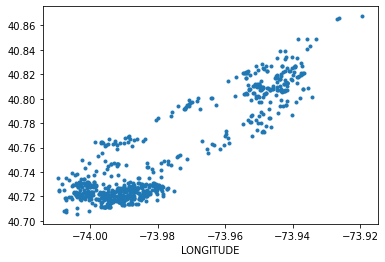

In [11]:
graffiti_df.plot(x='LONGITUDE', y='LATITUDE', style='.', legend=False)
plt.show()

### Some Manhattan maps

* https://github.com/codeforgermany/click_that_hood/blob/main/public/data/manhattan.geojson
* https://github.com/ResidentMario/geoplot-data/blob/master/nyc-police-precincts.geojson

In [12]:
manhattan_gdf=gpd.read_file('../data/manhattan.geojson')

In [13]:
manhattan_gdf.shape

(37, 5)

In [14]:
manhattan_gdf

,cartodb_id,name,created_at,updated_at,geometry
0,9,Battery Park City,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.01426 ..."
1,50,Central Park,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.94966 40.79707, -73.94964 ..."
2,52,Chelsea,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99346 40.75219, -73.98794 ..."
3,54,Chinatown,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99999 40.71798, -73.99864 ..."
4,57,Civic Center,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99799 40.71272, -73.99777 ..."
5,84,East Harlem,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.93383 40.81952, -73.93383 ..."
6,87,East Village,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99070 40.73478, -73.98255 ..."
7,91,Ellis Island,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.04166 40.69645, -74.04367 ..."
8,98,Financial District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.00861 ..."
9,100,Flatiron District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.98338 40.74137, -73.98474 ..."


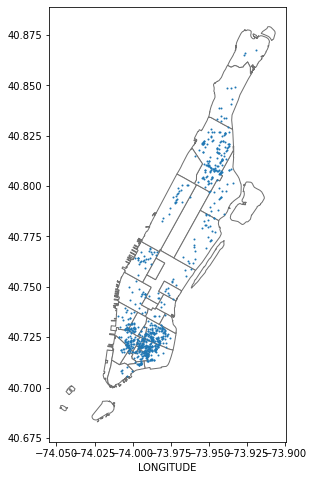

In [15]:
fig, ax = plt.subplots(figsize=(6,8))
base=manhattan_gdf.plot(color='white', edgecolor='#707070', ax=ax)
graffiti_df.plot(x='LONGITUDE', y='LATITUDE', style='.', legend=False, ax=base, markersize=2)
plt.show()

#### Police precincts


In [16]:
nypd_gdf = gpd.read_file('../data/nyc-police-precincts.geojson')

In [17]:
nypd_gdf.shape

(77, 4)

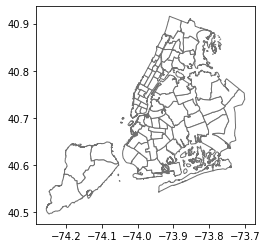

In [18]:
nypd_gdf.plot(color='white', edgecolor='#707070')
plt.show()

* This covers all the boroughs so need to subset for just Manhattan

In [19]:
nypd_gdf['precinct'].unique()

array(['1', '5', '6', '7', '9', '10', '13', '14', '17', '18', '19', '20',
       '22', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '52',
       '60', '61', '62', '63', '66', '67', '68', '69', '70', '71', '72',
       '73', '75', '76', '77', '78', '79', '81', '83', '84', '88', '90',
       '94', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '120',
       '121', '122', '123'], dtype=object)

* Get the numbers from the graffiti dataframe

In [20]:
precincts_to_keep = graffiti_df['POLICE_PRECINCT'].str.replace('Precinct ','')
precincts_to_keep

0                5
1      Unspecified
2                9
3      Unspecified
4      Unspecified
          ...     
754             10
755             28
756              7
757              9
758              1
Name: POLICE_PRECINCT, Length: 759, dtype: object

<Axes: >

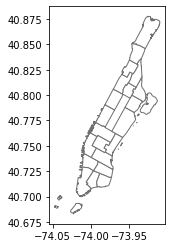

In [21]:
manhattan_precincts=nypd_gdf['precinct'].isin(precincts_to_keep)

nypd_gdf[manhattan_precincts].plot(color='white', edgecolor='#707070')

In [22]:
manhattan_precinct_gdf = nypd_gdf[manhattan_precincts]

In [23]:
manhattan_precinct_gdf.to_file("../data/manhattan_police_precincts.geojson", driver='GeoJSON')

/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
gpd.wrimanhattan_precinct_gdf.

In [24]:
manhattan_precinct_gdf.shape

(21, 4)

In [25]:
graffiti_by_pp = graffiti_df['POLICE_PRECINCT'].value_counts(dropna=False).reset_index()
graffiti_by_pp = graffiti_by_pp.rename(columns = {'index': 'precinct', 'POLICE_PRECINCT': 'graffiti_cnt'})
graffiti_by_pp['precinct_num']=graffiti_by_pp['precinct'].str.replace('Precinct ','')
graffiti_by_pp

,precinct,graffiti_cnt,precinct_num
0,Precinct 9,138,9
1,Precinct 5,118,5
2,Precinct 7,94,7
3,Precinct 1,63,1
4,Precinct 28,54,28
5,Precinct 32,52,32
6,Precinct 6,47,6
7,Precinct 19,28,19
8,Precinct 18,26,18
9,Precinct 13,21,13


In [26]:
man_graff_gdf = manhattan_precinct_gdf.merge(graffiti_by_pp, left_on='precinct', right_on='precinct_num')

<Axes: >

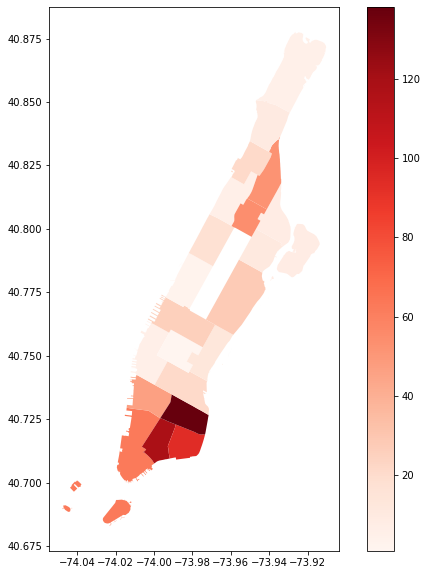

In [27]:
man_graff_gdf.plot(column='graffiti_cnt', 
                   figsize=(10,10), 
                   legend=True,
                   cmap='Reds'
                  )

### 2. Crime dataset

* Source: [https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn]


In [6]:
crime_df = pd.read_csv('../data/raw/crime_updated.csv')

In [8]:
crime_df.shape

(96805, 36)

In [13]:
crime_df['complaint_date']=pd.to_datetime(crime_df['CMPLNT_FR_DT'], errors='coerce')

In [19]:
year2022_filter=crime_df['complaint_date'].dt.year==2022

crime_df[year2022_filter]['complaint_date'].dt.month.value_counts().sort_index()

1     9206
2     9830
3    11269
4    10901
5    11723
6    12077
7    11719
8    11511
9     6181
Name: complaint_date, dtype: int64

In [ ]:
crime_df.sample(10)

In [ ]:
crime_df.columns

In [ ]:
complaint_df = pd.read_csv('../data/NYPD_Complaint_Data_Current__Year_To_Date_.csv', skiprows=1,
                          header=0)

In [ ]:
complaint_df.columns = crime_df.columns

In [ ]:
complaint_df

In [ ]:
complaint_df.sample(10)

In [171]:
complaint_df=pd.read_csv('../data/NYPD_Complaint_Data_2022.csv')

In [172]:
complaint_df.shape

(520043, 35)

In [173]:
complaint_df['complaint_date']=pd.to_datetime(complaint_df['CMPLNT_FR_DT'])

In [174]:
complaint_df[man_filter]['complaint_date'].dt.month.value_counts(sort=False)

1      9196
2      9819
3     11264
4     10897
5     11705
6     12070
7     11707
8     11505
9     11379
10    11393
11    10556
12     9384
Name: complaint_date, dtype: int64

In [175]:
man_filter=complaint_df['BORO_NM']=='MANHATTAN'

In [176]:
complaint_df[man_filter].shape

(130875, 36)

### Protected streets data

* https://data.cityofnewyork.us/Transportation/Protected-Streets-Map-Block-Dataset-/wyih-3nzf

In [46]:
protected_df = pd.read_csv('../data/Protected_Streets_Map_-_Block__Dataset_.csv')

In [47]:
protected_df.shape

(26665, 10)

In [48]:
protected_df.head()

,the_geom,OBJECTID,OFTCode,GeoBoroughCode,OnstreetName,FromStreet,ToStreetName,DateProtectedFrom,DateProtectedTo,Shape.STLength()
0,MULTILINESTRING ((-73.98749104757336 40.724573...,1,110010117050117070,M,1 AVENUE,EAST 3 STREET,EAST 4 STREET,04/29/2019,04/29/2024,256.855
1,MULTILINESTRING ((-73.98704399194158 40.725191...,3,110010117070117090,M,1 AVENUE,EAST 4 STREET,EAST 5 STREET,04/29/2019,04/29/2024,246.227
2,MULTILINESTRING ((-73.98660321952282 40.725778...,5,110010117090117110,M,1 AVENUE,EAST 5 STREET,EAST 6 STREET,04/29/2019,04/29/2024,256.707
3,MULTILINESTRING ((-73.98616358058572 40.726398...,7,110010117110117130,M,1 AVENUE,EAST 6 STREET,EAST 7 STREET,04/29/2019,04/29/2024,240.782
4,MULTILINESTRING ((-73.984857631691 40.72817683...,10,110010117170117190,M,1 AVENUE,EAST 9 STREET,EAST 10 STREET,04/30/2019,04/30/2024,245.763


In [51]:
manhattan_protected_df = protected_df.query("GeoBoroughCode=='M'")

In [64]:
manhattan_protected_gdf=gpd.GeoDataFrame(manhattan_protected_df, 
                 geometry=[shapely.wkt.loads(g) for g in manhattan_protected_df['the_geom']])

<Axes: >

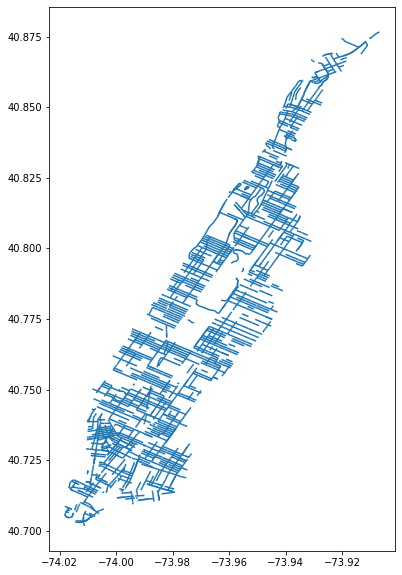

In [67]:
manhattan_protected_gdf.plot(figsize=(10,10))

## Checking graffiti data

In [73]:
graf2022_df = pd.read_csv('../data/nyc_graffiti_2022.csv')

In [74]:
graf2022_df.shape

(18019, 41)

In [77]:
graf_man_filter=graf2022_df['Borough']=='MANHATTAN'

In [165]:
graf2022_gdf.shape

(3241, 43)

In [79]:
graf2022_df[graf_man_filter].value_counts('Agency')

Agency
DSNY    1928
NYPD     753
DPR      340
DOT      209
DOE        9
OTI        2
dtype: int64

In [166]:
by_month=pd.to_datetime(graf2022_df[graf_man_filter]['Created Date']).dt.month.value_counts(sort=False)

In [167]:
by_month

1     308
2     319
3     547
4     192
5     195
6     208
7     181
8     234
9     212
10    272
11    194
12    379
Name: Created Date, dtype: int64

In [92]:
graf2022_df['date']=pd.to_datetime(graf2022_df['Created Date'])

In [108]:
graf2022_df[graf_man_filter].query('date.dt.month==2')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date
1008,53246947,02/02/2022 04:54:32 PM,10/20/2022 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,10034.0,3961 10 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867285,-73.916839,"(40.86728532018021, -73.91683931214769)",2022-02-02 16:54:32
1071,53235406,02/01/2022 06:52:39 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10003.0,49 1/2 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.724671,-73.987434,"(40.724671088232, -73.98743407744216)",2022-02-01 18:52:39
1102,53236039,02/01/2022 05:37:52 PM,02/01/2022 06:49:02 PM,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Store/Commercial,10009.0,72 AVENUE A,...,NaN,NaN,NaN,NaN,NaN,NaN,40.724770,-73.984458,"(40.7247695361905, -73.98445763007553)",2022-02-01 17:37:52
1132,53237178,02/01/2022 09:15:22 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10013.0,166 AVENUE OF AMERICAS,...,NaN,NaN,NaN,NaN,NaN,NaN,40.725619,-74.003976,"(40.72561864652275, -74.00397583793023)",2022-02-01 09:15:22
1141,53237548,02/01/2022 04:50:24 PM,02/01/2022 05:33:45 PM,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Residential Building/House,10009.0,66 AVENUE A,...,NaN,NaN,NaN,NaN,NaN,NaN,40.724586,-73.984591,"(40.724585655390264, -73.98459116091409)",2022-02-01 16:50:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,53367673,02/14/2022 01:11:53 PM,04/04/2023 02:44:57 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Graffiti or Vandalism,Park,10016.0,EAST RIVER ESPLANADE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.743179,-73.972021,"(40.74317899569088, -73.9720210557732)",2022-02-14 13:11:53
17912,53241543,02/01/2022 06:51:32 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,10009.0,444 EAST 6 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.725961,-73.985146,"(40.72596085172248, -73.98514645291816)",2022-02-01 18:51:32
17933,53277094,02/04/2022 11:58:42 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,10009.0,152 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.728330,-73.984735,"(40.728329522721346, -73.98473461463642)",2022-02-04 11:58:42
17935,53297604,02/07/2022 10:33:23 AM,01/11/2023 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,10001.0,137 WEST 31 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.748394,-73.990317,"(40.74839426611669, -73.99031686019518)",2022-02-07 10:33:23


<Axes: >

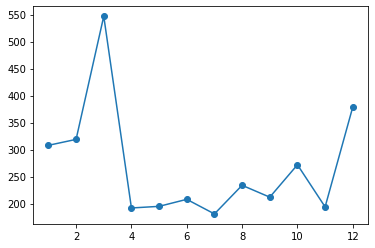

In [168]:
by_month.plot(style='o-')

In [207]:
man_graf_2022_df = graf2022_df[graf_man_filter]

In [208]:
man_graf_2022_df.shape

(3241, 42)

In [232]:
# drop rows where now Long or Lat data
man_graf_2002_df=man_graf_2022_df.dropna(subset=['Longitude','Latitude'])

In [239]:
man_graf_2022_df.dropna(subset=['Longitude','Latitude'])['Latitude'].isna().sum()

0

In [240]:
graf2022_gdf = gpd.GeoDataFrame(man_graf_2022_df,
                                geometry=gpd.points_from_xy(
                                        x=man_graf_2022_df['Longitude'],
                                        y=man_graf_2022_df['Latitude']))

In [260]:
gpd.points_from_xy(
                                        x=man_graf_2022_df['Longitude'],
                                        y=man_graf_2022_df['Latitude'])[3000:]

<GeometryArray>
 ...
Length: 241, dtype: geometry

In [283]:
graf2022_gdf=graf2022_gdf.dropna(subset='Latitude')

In [219]:
month_name = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 'October',
               'November', 'December']

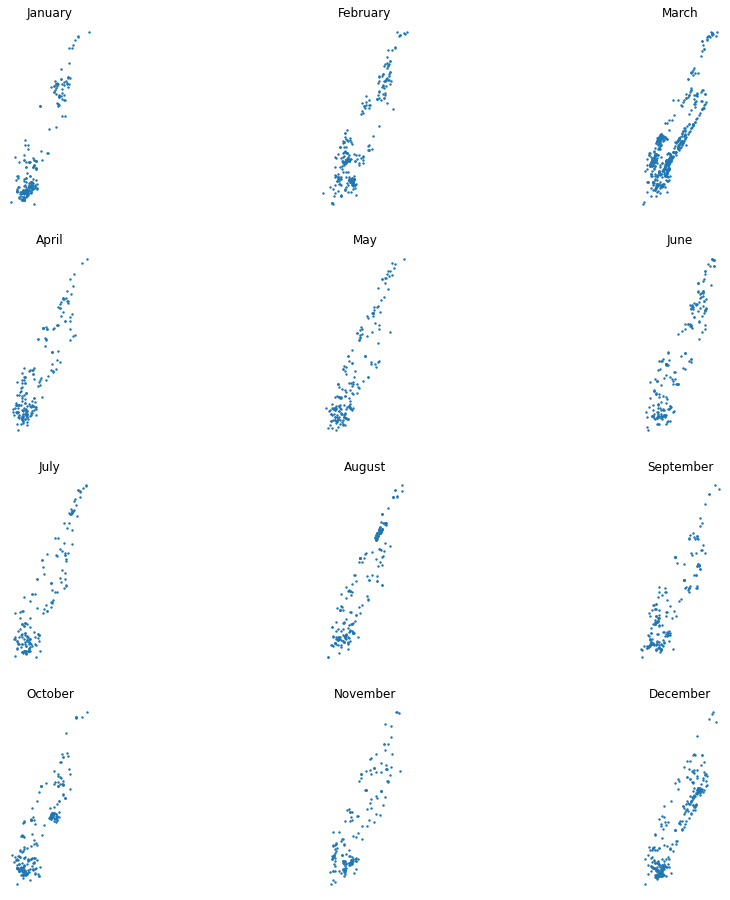

In [321]:
fig, ax = plt.subplots(4,3, figsize=(16,16))

for mnum in range(0,12):
    row = (mnum // 3)
    col = (mnum % 3) 
    
    
    graf2022_gdf.query(f'date.dt.month=={mnum+1}').plot(markersize=2, ax=ax[row][col])
    ax[row][col].axis('off')
    ax[row][col].set_title(month_name[mnum])

### Doing a spatial join on two geo data frames

<Axes: >

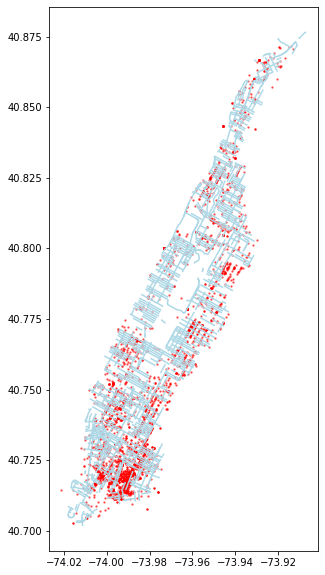

In [304]:
streets=manhattan_protected_gdf.plot(edgecolor='lightblue', figsize=(16,10))

graf2022_gdf.plot(ax=streets, markersize=2, color='red', alpha=0.5)

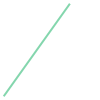

In [294]:
manhattan_protected_gdf['geometry'].loc[100]

In [298]:
graf2022_gdf=graf2022_gdf.set_crs("EPSG:4326")

In [299]:
manhattan_protected_gdf=manhattan_protected_gdf.set_crs("EPSG:4326")

In [300]:
manhattan_protected_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [306]:
gpd.sjoin(
    graf2022_gdf,
    manhattan_protected_gdf,
    op='overlaps'
          )

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,the_geom,OBJECTID,OFTCode,GeoBoroughCode,OnstreetName,FromStreet,ToStreetName,DateProtectedFrom,DateProtectedTo,Shape.STLength()


In [315]:
graf2022_gdf['geometry'].crosses(manhattan_protected_gdf['geometry']).sum()

/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0

<Axes: >

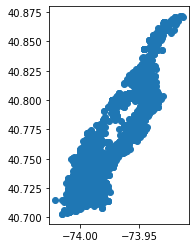

In [287]:
graf2022_gdf.plot()

In [318]:
graf2022_gdf.to_file('../data/manhattan_graffiti_2022.geojson', driver='GeoJSON')

/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [319]:
manhattan_protected_gdf.to_file('../manhattan_protected_streets.geojson', driver='GeoJSON')

/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [320]:
complaint_df[man_filter].to_csv('../data/manhattan_complaint_data_2022.csv', index=False)